In [62]:
##Import all the required libraries/Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')


In [2]:
##Import the dataset
df=pd.read_csv('day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1022]:
df.shape

(730, 16)

In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
## Chekc if any Null columns and % of null values in the columns of the dataset
df.isnull().mean()*100


instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [753]:
## No columns have Null values

In [6]:
## Check how many nul values across the rows
df_null_columns = df.isnull().any(axis=1)
df_null_rows = df[df_null_columns]

print(df_null_rows)

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [ ]:
## We dont see any null rows in the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
df.value_counts()

instant  dteday      season  yr  mnth  holiday  weekday  workingday  weathersit  temp       atemp     hum      windspeed  casual  registered  cnt 
1        01-01-2018  1       0   1     0        6        0           2           14.110847  18.18125  80.5833  10.749882  331     654         985     1
480      25-04-2019  2       1   4     0        3        1           1           19.543347  23.51585  42.7917  7.959064   655     5541        6196    1
482      27-04-2019  2       1   4     0        5        1           1           18.757500  22.63185  40.0833  23.291411  1014    5219        6233    1
483      28-04-2019  2       1   4     0        6        0           2           15.443347  18.87520  48.9583  8.708325   1120    3100        4220    1
484      29-04-2019  2       1   4     0        0        0           1           18.791653  22.50605  58.7083  7.832836   2229    4075        6304    1
                                                                                             

In [ ]:
## Reading the Dictionary content of the dataset

In [9]:
Dict=open('Dictionary.txt')
Dict_content=Dict.read()
print(Dict_content)
Dict.close()

Dataset characteristics
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
License

In [10]:
## Based on the above descritpion seems like 4 Columns are reduandant and doesnt server any purpose in the dataser
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
num_cols=['temp', 'atemp', 'hum', 'windspeed','cnt']
cat_cols=['season','mnth','holiday', 'weekday','workingday','yr','weathersit']

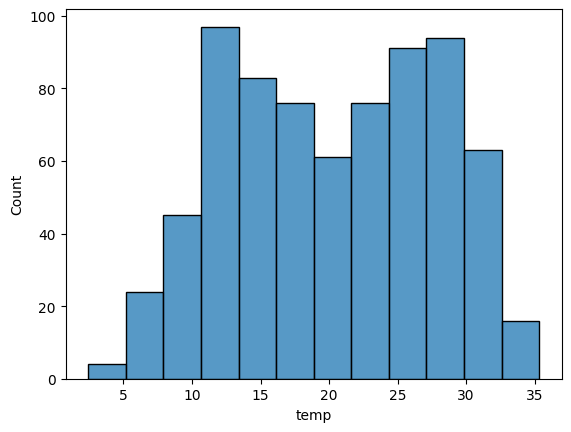

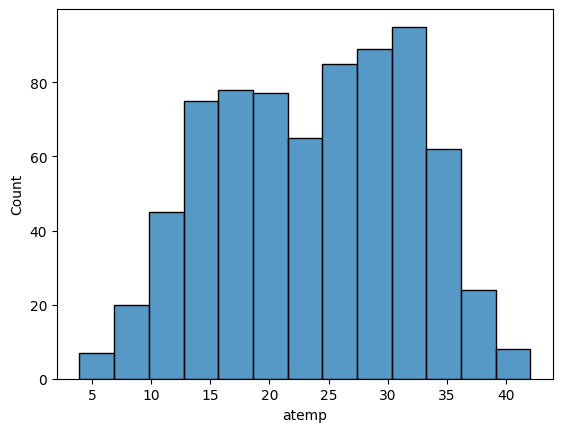

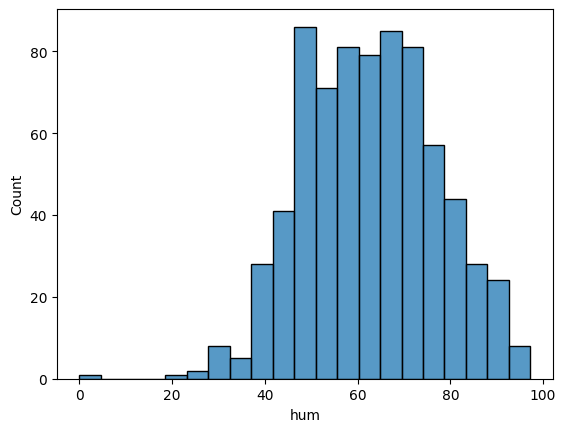

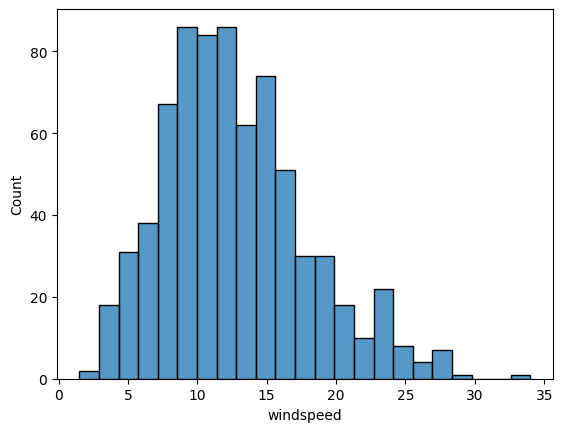

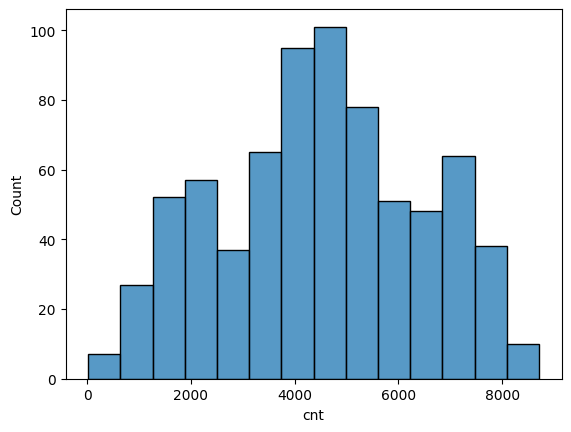

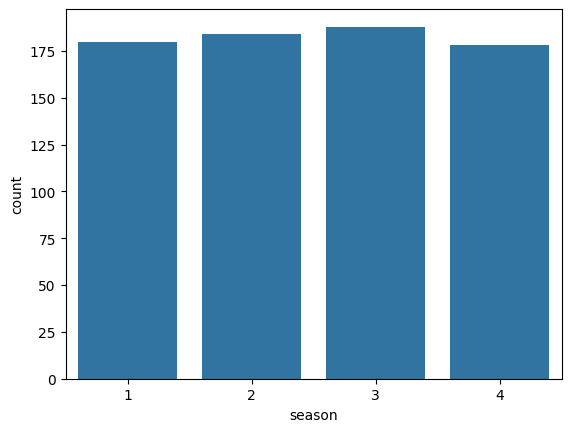

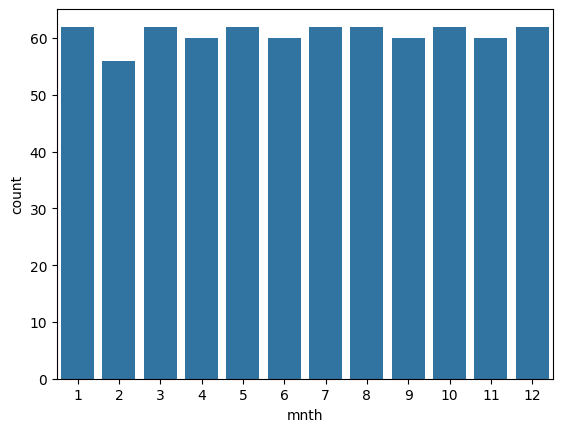

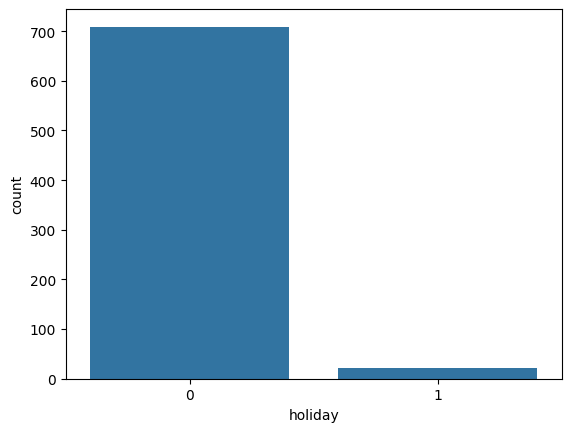

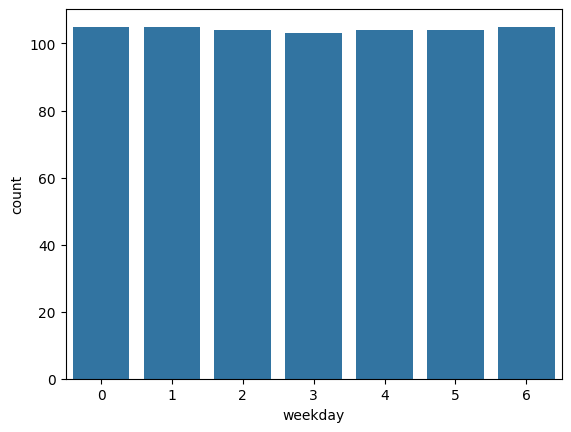

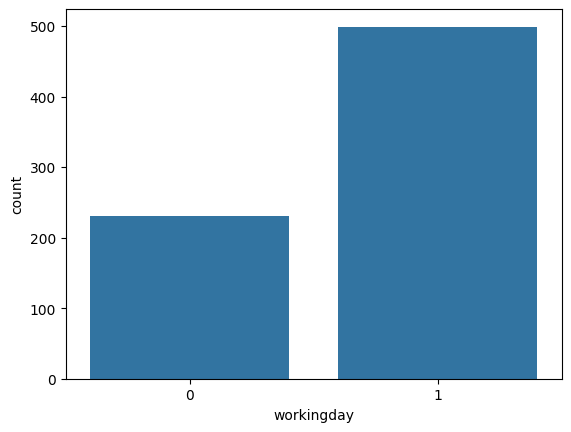

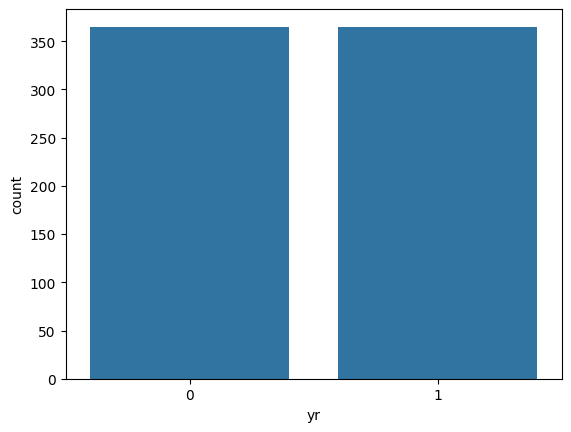

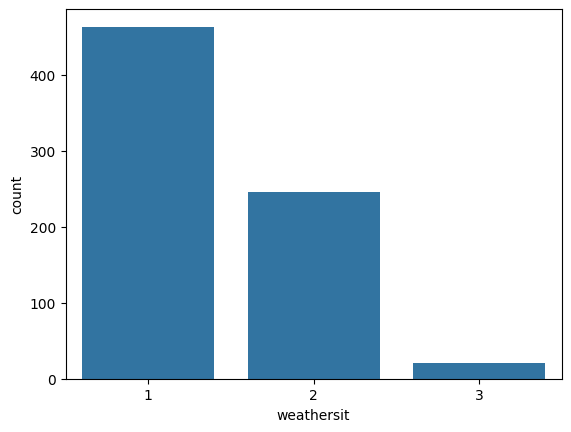

In [12]:
# Univariate Analysis 
for i in num_cols: 
    sns.histplot(x=df[i]) 
    plt.show() 
for i in cat_cols: 
    sns.countplot(x=df[i]) 
    plt.show() 

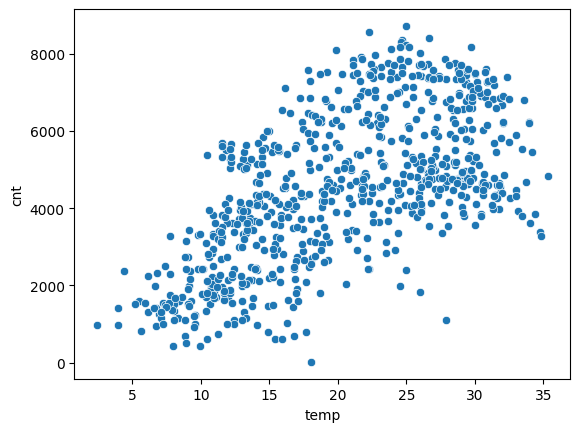

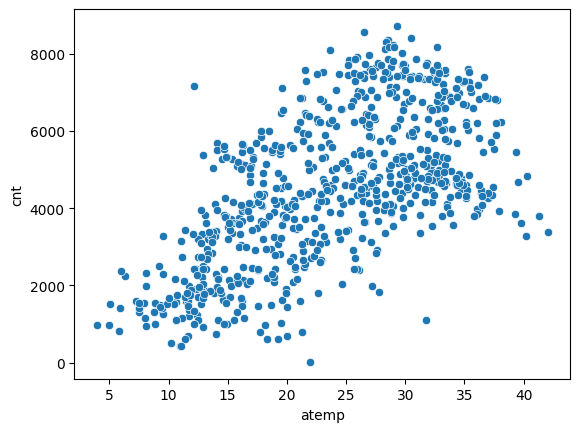

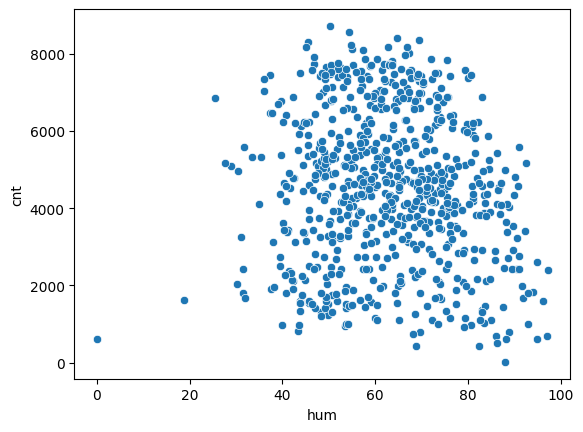

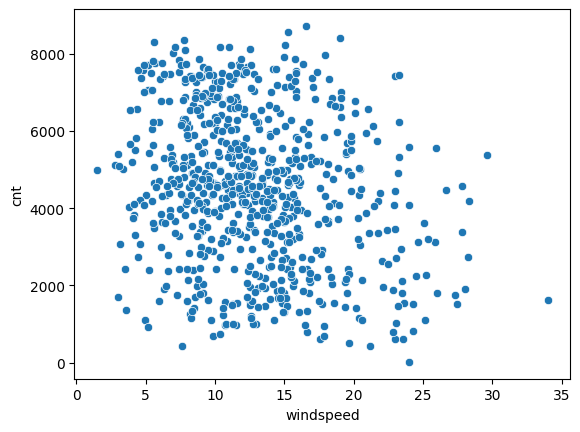

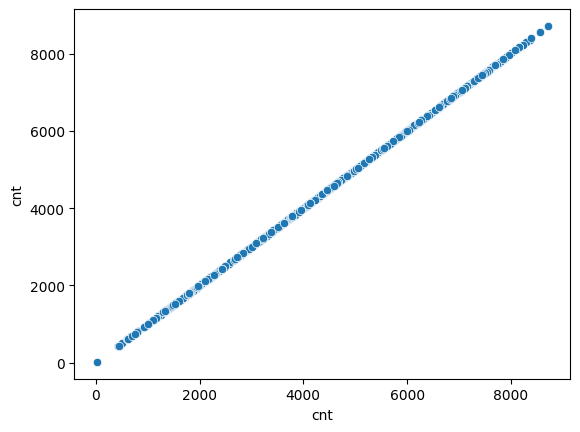

In [1032]:
# Bivariate Analysis 
#sns.pairplot(df[num_cols]) 
#plt.show() f
for i in num_cols: 
    sns.scatterplot(x=df[i],y=df["cnt"])
    plt.show() 

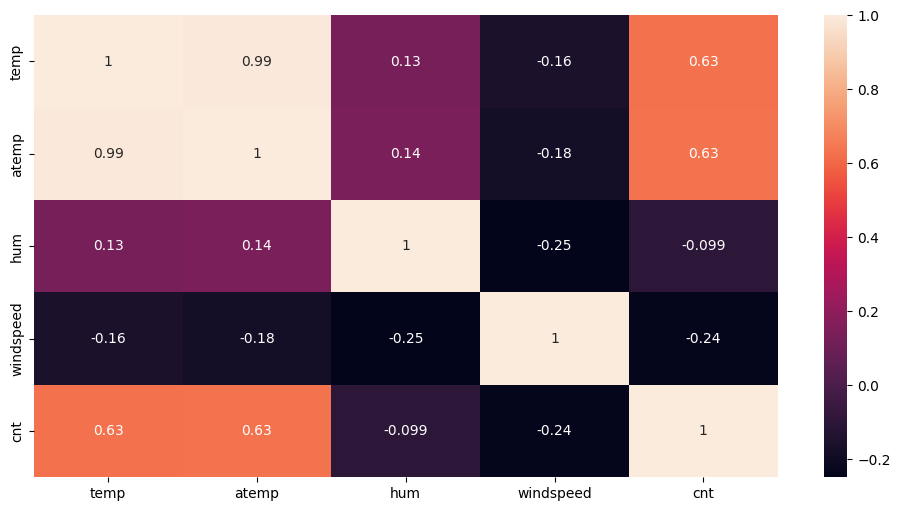

In [1033]:
# Multivariate Analysis 
plt.figure(figsize=(12,6)) 
sns.heatmap(df[num_cols].corr(),annot=True) 
plt.show()

In [ ]:
## Dropping 
## instant - Its just Index vlue of the Dataset
## dteday - We have derived columns in terms of month,day and Year
## casual & registered - Total cnt, arec combination of both casual and registred bike rentals. All 3 features will behave similar, We are
## considering the cnt as dependent variable removing these 2 columns

In [13]:
## Creating a new dataset df_new , thise doesnt contain the above mentioend columns
df_new=df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']]

In [1035]:
df_new.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [14]:
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


<Axes: >

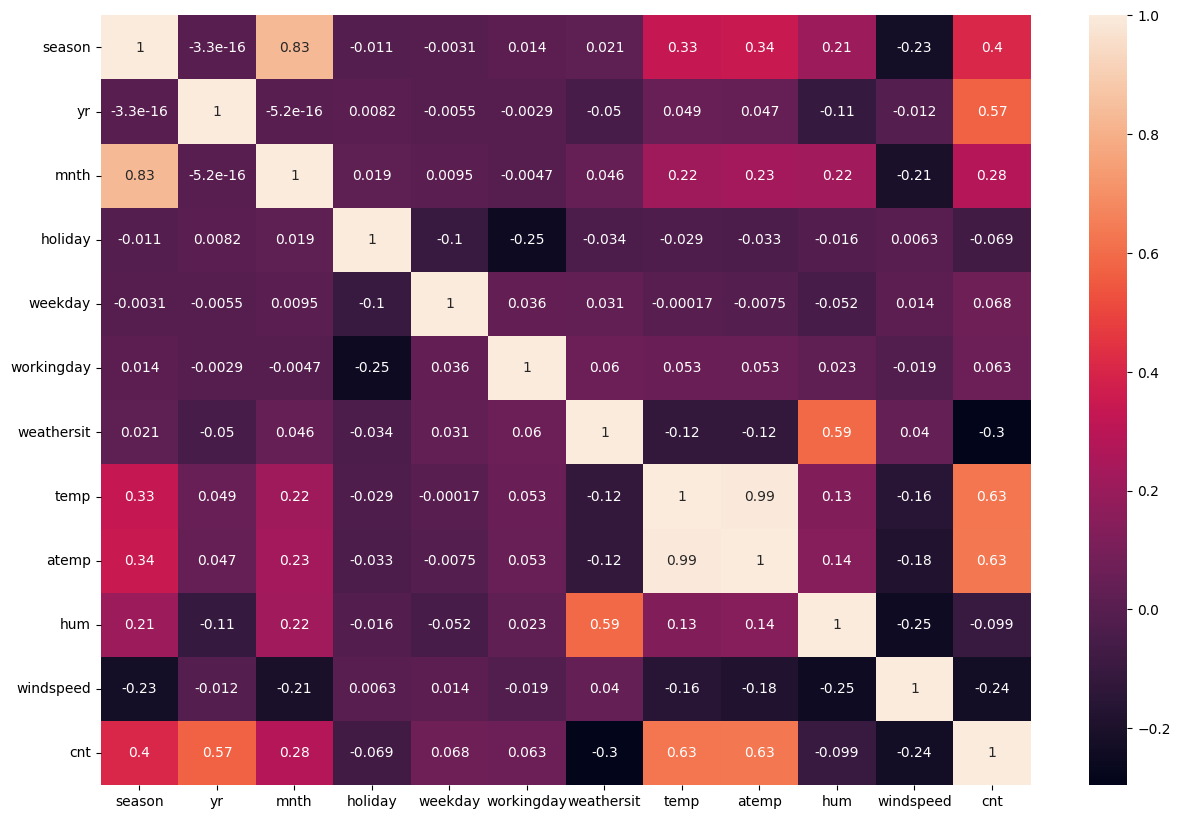

In [16]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_new.corr(numeric_only=True),annot=True)

In [17]:
### Checking for the outliers every independent variable  in the Dataset
X_outliers=df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit', 'temp', 'atemp', 'hum', 'windspeed']]

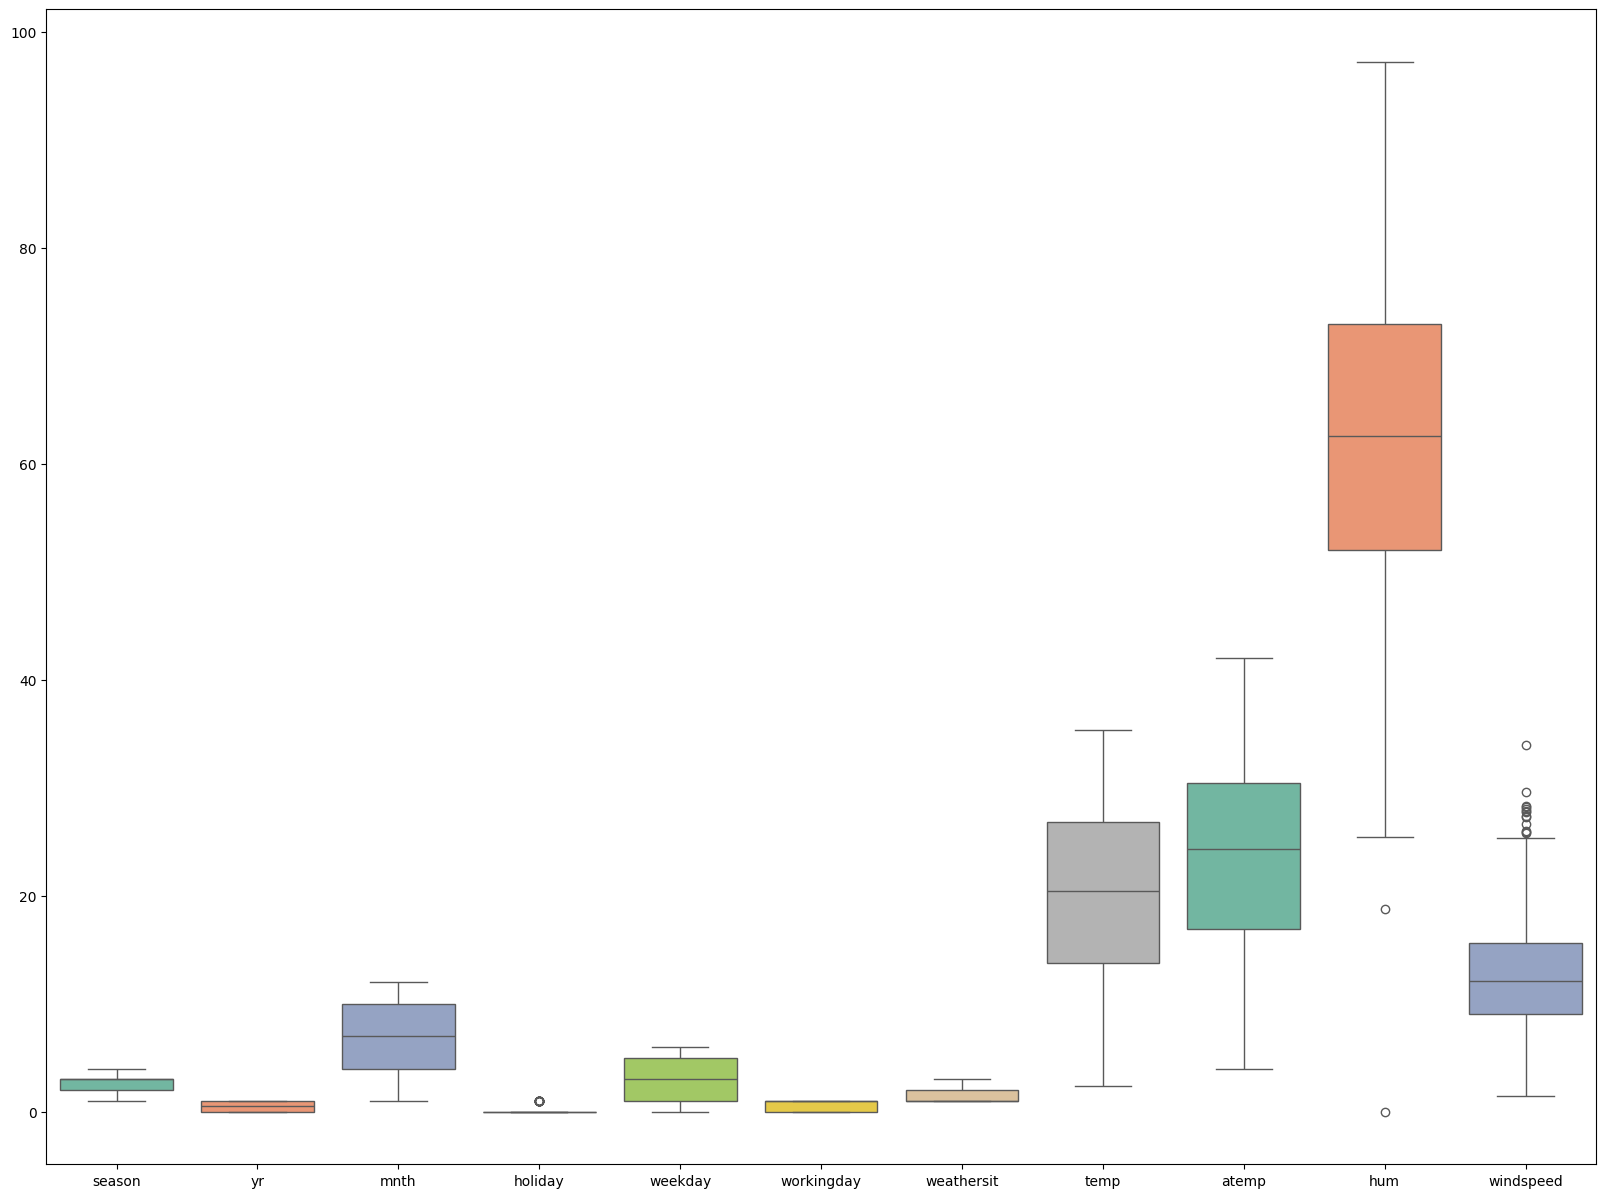

In [18]:
fig = plt.figure(figsize =(20, 15))
ax = sns.boxplot(data=X_outliers, orient="v", palette="Set2")
np.random.seed(10)


In [19]:
df_new['windspeed'].describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

In [20]:
df_new[df_new['windspeed']>34]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
49,1,0,2,0,6,0,1,16.365847,19.5702,18.7917,34.000021,1635


In [ ]:
### We can see Features doesnt contain any outliers

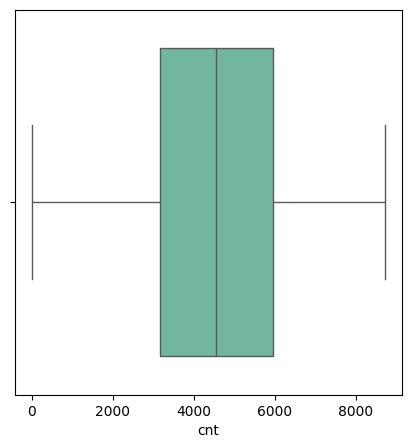

In [21]:
y_outliers=df_new['cnt']
fig = plt.figure(figsize =(5, 5))
ax = sns.boxplot(data=y_outliers, orient="h", palette="Set2")
np.random.seed(10)

In [ ]:
### We can see dependent  varibale also doesnt contain any outliers

In [26]:
sns.pairplot(df_new)


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x11542a340> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



Error in callback <function flush_figures at 0x165aa22a0> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



## Data Preparation

In [27]:
df_new.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [ ]:
## Convert the columns season,yr,mnth,holiday,weekday,workingday,weathersit
## As yr,hoiday,workingday consists of only 2 possibalities (0 &1), excluding them in creating dummpy values for these columns

In [28]:
cat_columns=['season','mnth','weekday','weathersit']

In [29]:
df_new.select_dtypes(include='number')

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [30]:
df_new[['season','mnth','weekday','weathersit']].value_counts()

season  mnth  weekday  weathersit
1       1     0        1             8
3       7     3        1             8
        8     3        1             8
              2        1             8
4       11    5        1             8
                                    ..
        9     1        1             1
              0        2             1
1       12    6        2             1
2       3     1        2             1
3       6     2        2             1
Name: count, Length: 232, dtype: int64

In [31]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [32]:
## Convert all the 4 columns into Object type from int
df_new['season']=df_new['season'].astype('category')
df_new['mnth']=df_new['mnth'].astype('category')
df_new['weekday']=df_new['weekday'].astype('category')
df_new['weathersit']=df_new['weathersit'].astype('category')

In [1051]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [33]:
print(Dict_content)

Dataset characteristics
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
License

In [35]:
##Adding these names, so when dummies are created columns will be created with some meaningful names
df_new.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
df_new.weathersit.replace({1:'Clear',2:'Mist_Cloudy',3:'Light_Snow',4:'Heavy Rain_Ice Pallets'},inplace = True)
df_new.mnth = df_new.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
df_new.weekday = df_new.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
df_new.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [36]:
df_new.season.value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [37]:
## Creating dummies for the 4 columns season,mnth,weekday,weathersit
## drop_first=True, It will not consider the value with 00 assigned to it, When we tried this for mnth and weekdays columns, 
## It actually dropped the December and Sunday, Now setting them flse created columns for all the values including the default value.

df_new= pd.get_dummies(data=df_new,columns=['weathersit','season','mnth','weekday'],dtype=int,drop_first=False)


In [38]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      730 non-null    int64  
 1   holiday                 730 non-null    int64  
 2   workingday              730 non-null    int64  
 3   temp                    730 non-null    float64
 4   atemp                   730 non-null    float64
 5   hum                     730 non-null    float64
 6   windspeed               730 non-null    float64
 7   cnt                     730 non-null    int64  
 8   weathersit_Clear        730 non-null    int64  
 9   weathersit_Mist_Cloudy  730 non-null    int64  
 10  weathersit_Light_Snow   730 non-null    int64  
 11  season_spring           730 non-null    int64  
 12  season_summer           730 non-null    int64  
 13  season_fall             730 non-null    int64  
 14  season_winter           730 non-null    in

In [39]:
df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_Clear,weathersit_Mist_Cloudy,...,mnth_oct,mnth_nov,mnth_dec,weekday_sun,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,0,0


In [40]:
df_new.shape

(730, 34)

In [41]:
## Dataset ready for Model prepration
df_MR=df_new

In [42]:
df_MR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      730 non-null    int64  
 1   holiday                 730 non-null    int64  
 2   workingday              730 non-null    int64  
 3   temp                    730 non-null    float64
 4   atemp                   730 non-null    float64
 5   hum                     730 non-null    float64
 6   windspeed               730 non-null    float64
 7   cnt                     730 non-null    int64  
 8   weathersit_Clear        730 non-null    int64  
 9   weathersit_Mist_Cloudy  730 non-null    int64  
 10  weathersit_Light_Snow   730 non-null    int64  
 11  season_spring           730 non-null    int64  
 12  season_summer           730 non-null    int64  
 13  season_fall             730 non-null    int64  
 14  season_winter           730 non-null    in

## Dividing the data into Trainset and Test set

In [43]:
df_train,df_test = train_test_split(df_MR, train_size=0.7,test_size=0.3,random_state=100)

In [44]:
print(df_train.shape)
print(df_test.shape)


(510, 34)
(219, 34)


In [45]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      510 non-null    int64  
 1   holiday                 510 non-null    int64  
 2   workingday              510 non-null    int64  
 3   temp                    510 non-null    float64
 4   atemp                   510 non-null    float64
 5   hum                     510 non-null    float64
 6   windspeed               510 non-null    float64
 7   cnt                     510 non-null    int64  
 8   weathersit_Clear        510 non-null    int64  
 9   weathersit_Mist_Cloudy  510 non-null    int64  
 10  weathersit_Light_Snow   510 non-null    int64  
 11  season_spring           510 non-null    int64  
 12  season_summer           510 non-null    int64  
 13  season_fall             510 non-null    int64  
 14  season_winter           510 non-null    int64 

## From here on, We will Keep the Test set seperate, All the actions/Models building actvity will be performed on Train Set

# Train Set - Only

In [46]:
df_train.value_counts()

yr  holiday  workingday  temp       atemp     hum      windspeed  cnt   weathersit_Clear  weathersit_Mist_Cloudy  weathersit_Light_Snow  season_spring  season_summer  season_fall  season_winter  mnth_jan  mnth_feb  mnth_mar  mnth_apr  mnth_may  mnth_jun  mnth_jul  mnth_aug  mnth_sept  mnth_oct  mnth_nov  mnth_dec  weekday_sun  weekday_mon  weekday_tue  weekday_wed  weekday_thu  weekday_fri  weekday_sat
0   0        0           2.424346   3.95348   40.0000  11.521990  981   1                 0                       0                      1              0              0            0              1         0         0         0         0         0         0         0         0          0         0         0         0            0            0            0            0            0            1              1
1   0        1           10.591653  12.75210  45.6667  13.458625  3956  1                 0                       0                      1              0              0            0  

### 1. Rescaling the data - Normalization - Using MIN MAX Library  - Onlly on Fetaures and non Binary valued columns

In [47]:
##initiate a object
scaler=MinMaxScaler()

## Create a list of Numerical vars
var=['temp','atemp','hum','windspeed','cnt']

#Fit the method
df_train[var]= scaler.fit_transform(df_train[var])
df_test[var]= scaler.transform(df_test[var])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_Clear,weathersit_Mist_Cloudy,...,mnth_oct,mnth_nov,mnth_dec,weekday_sun,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,1,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,1,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,1


In [48]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_Clear,weathersit_Mist_Cloudy,...,mnth_oct,mnth_nov,mnth_dec,weekday_sun,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.627451,0.343137,...,0.086275,0.086275,0.084314,0.143137,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.483958,0.475223,...,0.281045,0.281045,0.278131,0.350557,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

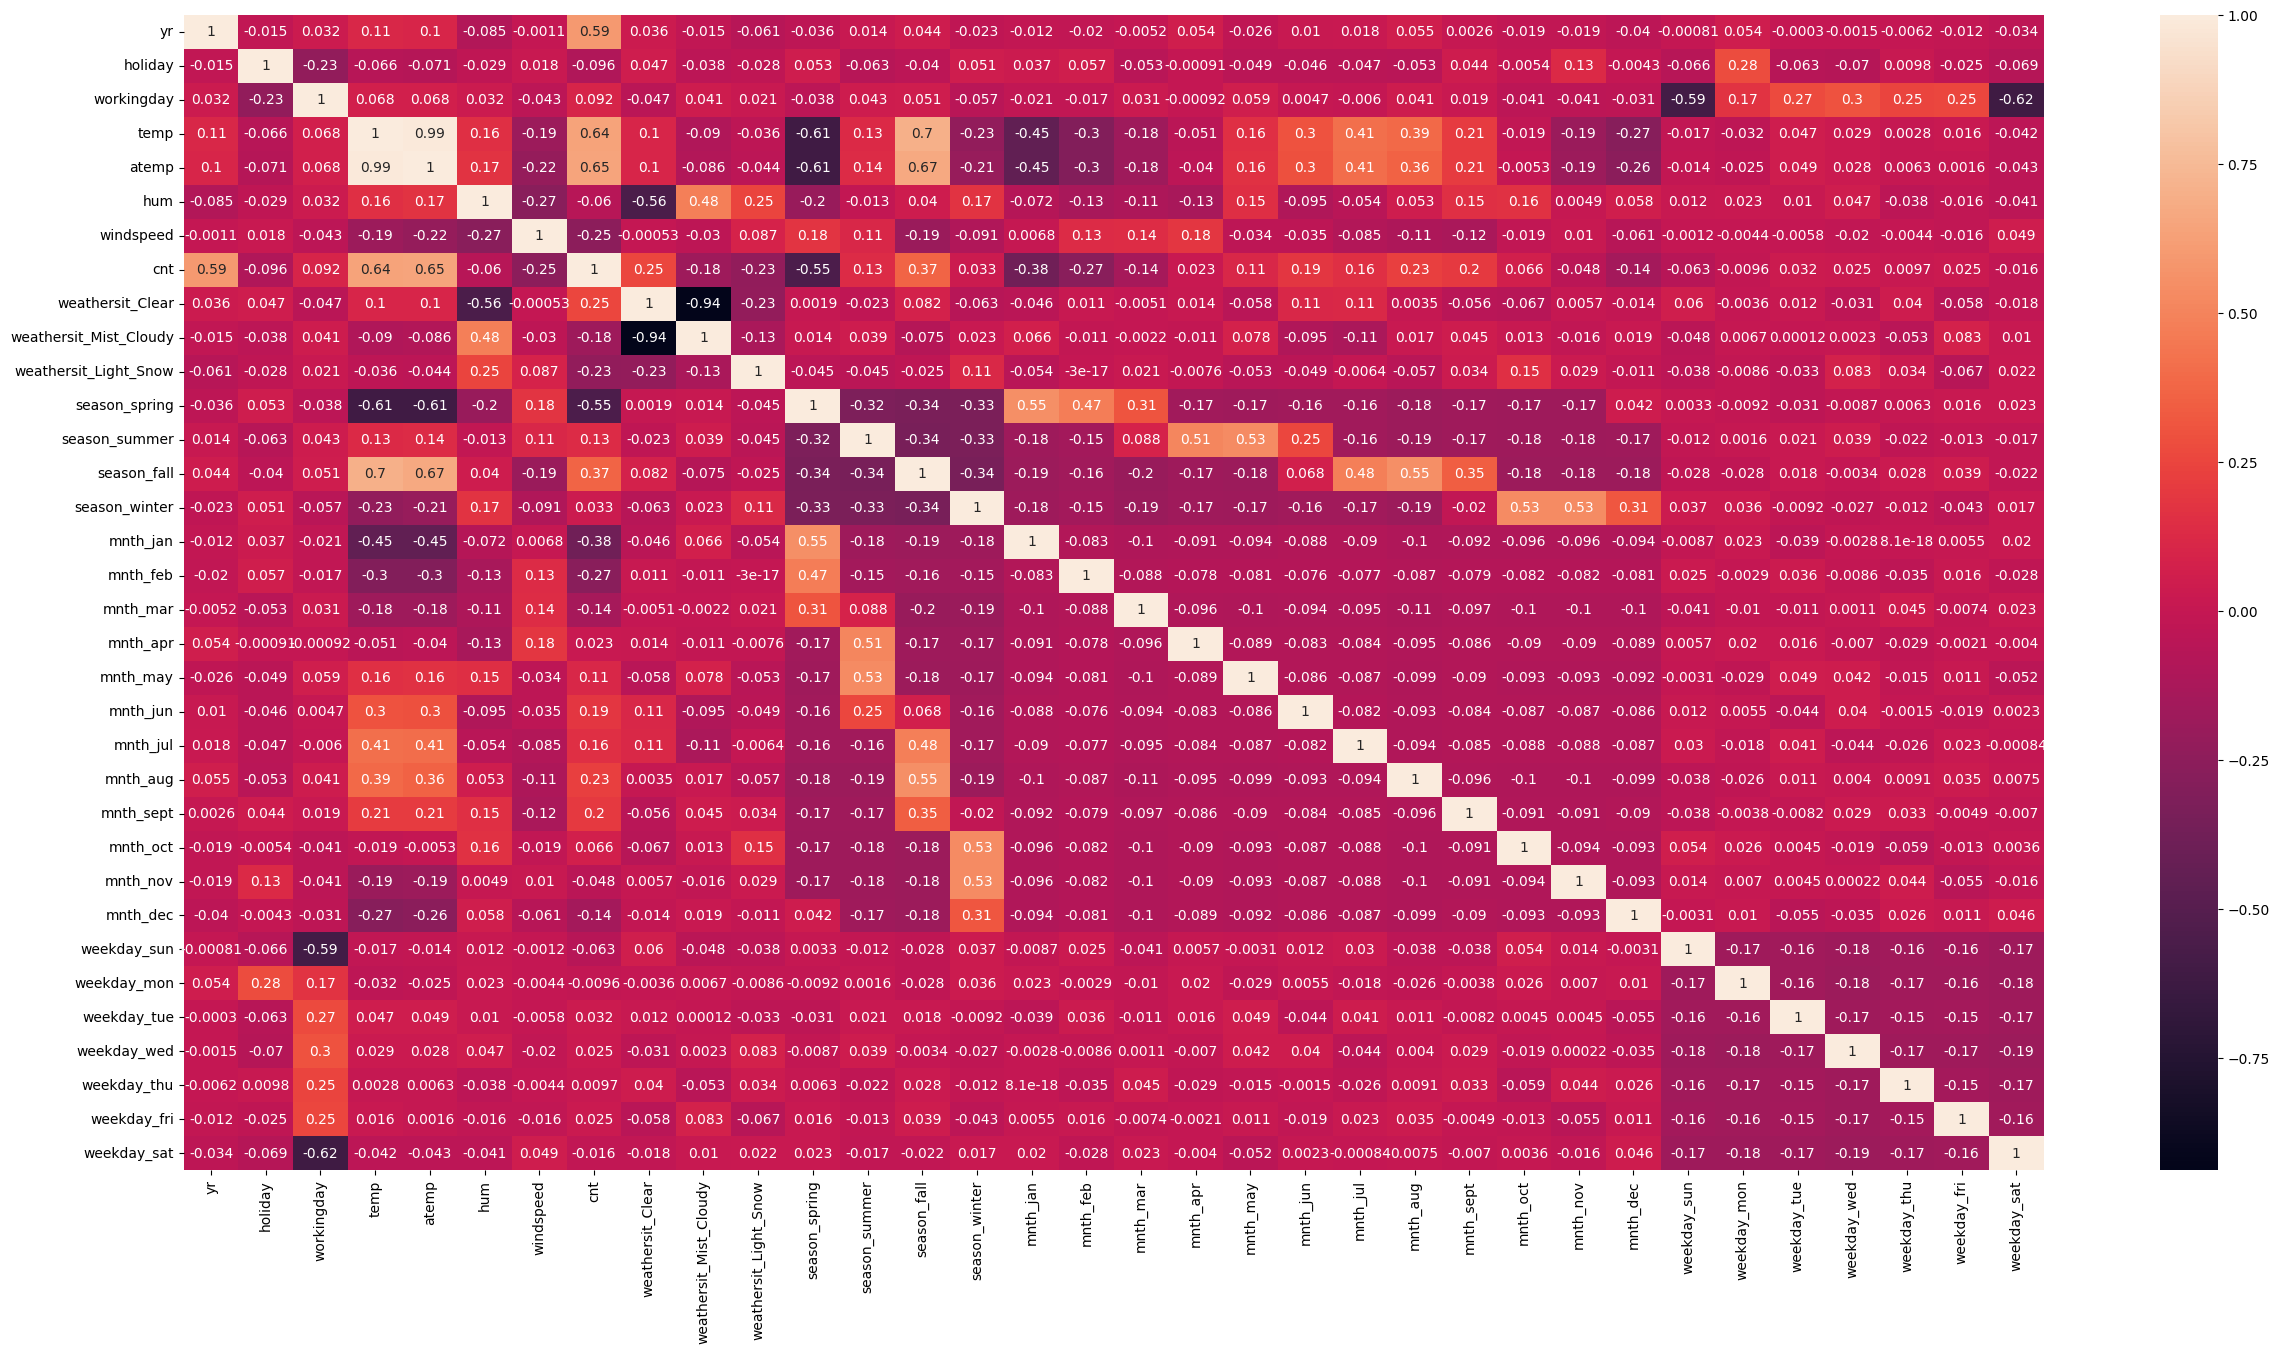

In [49]:

plt.figure(figsize=(30,15))
sns.heatmap(df_train.corr(numeric_only=True),annot=True)

In [50]:
## Out of 34 Columns we have, cnt is the Dependednt Column and rest all 33 are Independent columns.
## As the number of columns are high, I would rather start with RFE and based on need i shall add or remove columns manually 

y_train=df_train.pop('cnt')
X_train=df_train
X_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,weathersit_Clear,weathersit_Mist_Cloudy,weathersit_Light_Snow,...,mnth_oct,mnth_nov,mnth_dec,weekday_sun,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat
653,1,0,1,0.509887,0.501133,0.575354,0.300794,1,0,0,...,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,1,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,1,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,1,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.762183,0.605840,0.355596,0,1,0,...,0,0,0,0,1,0,0,0,0,0
578,1,0,1,0.863973,0.824359,0.679690,0.187140,1,0,0,...,0,0,0,0,0,0,0,1,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,1,0,0,...,0,0,0,0,0,0,1,0,0,0
350,0,0,0,0.248216,0.223544,0.577930,0.431816,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [730]:
# Building the First Model
# BASE Model - With all the features

In [1068]:
# BASE MODEL - Building it on all the Features

In [51]:
X_train.shape

(510, 33)

In [56]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const                     0.108930
yr                        0.232208
holiday                  -0.031370
workingday                0.054903
temp                      0.401322
atemp                     0.050628
hum                      -0.151812
windspeed                -0.184388
weathersit_Clear          0.142219
weathersit_Mist_Cloudy    0.081189
weathersit_Light_Snow    -0.114478
season_spring            -0.045103
season_summer             0.041693
season_fall               0.003477
season_winter             0.108864
mnth_jan                 -0.045861
mnth_feb                 -0.015472
mnth_mar                  0.017992
mnth_apr                  0.016704
mnth_may                  0.041395
mnth_jun                  0.015001
mnth_jul                 -0.022572
mnth_aug                  0.032780
mnth_sept                 0.098510
mnth_oct                  0.024399
mnth_nov                 -0.025078
mnth_dec                 -0.028868
weekday_sun               0.015433
weekday_mon         

In [63]:
# Instantiate
lm = LinearRegression()
# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [64]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 2.32207596e-01  8.90559133e+11  8.90559133e+11  3.03270850e-01
  1.09913272e-01 -1.83260050e-01 -1.89205971e-01  1.55087634e+11
  1.55087634e+11  1.55087634e+11  5.41945069e+11  5.41945069e+11
  5.41945069e+11  5.41945069e+11  5.21922848e+10  5.21922848e+10
  5.21922848e+10  5.21922848e+10  5.21922848e+10  5.21922848e+10
  5.21922848e+10  5.21922848e+10  5.21922848e+10  5.21922848e+10
  5.21922848e+10  5.21922848e+10  1.47820647e+12  5.87647335e+11
  5.87647335e+11  5.87647335e+11  5.87647335e+11  5.87647335e+11
  1.47820647e+12]
-2227431455224.052


In [65]:
# getting the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          8.42e-181
Time:                        19:13:36   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1089      0.019      5.841      0.000       0.072       0.146
yr                         0.2322      0.008     28.792      0.000       0.216       0.248
holiday                   -0.0314      0.020     -1.577      0.115      -0.070       0.008
workingday                 0.0549      0.009      6.083      0.000       0.037       0.073
temp                       0.4013      0.142      2.821      0.005       0.122       0.681
atemp                      0.0506      0.138      0.366      0.714      -0.221       0.322
hum                       -0.1518      0.039     -3.940      0.000      -0.228      -0.076
windspeed                 -0.1844      0.026     -7.003      0.000      -0.236      -0.133
weathersit_Clear           0.1422      0.009     15.622      0.000       0.124       0.160
weathersit_Mist_Cloudy     0.0812      0.010      7.804      0.000       0.061       0.102
weathersit_Light_Snow     -0.1145      0.020     -5.700      0.000      -0.154      -0.075
season_spring             -0.0451      0.016     -2.738      0.006      -0.077      -0.013
season_summer              0.0417      0.017      2.521      0.012       0.009       0.074
season_fall                0.0035      0.018      0.189      0.850      -0.033       0.040
season_winter              0.1089      0.018      6.026      0.000       0.073       0.144
mnth_jan                  -0.0459      0.024     -1.906      0.057      -0.093       0.001
mnth_feb                  -0.0155      0.023     -0.662      0.508      -0.061       0.030
mnth_mar                   0.0180      0.017      1.067      0.286      -0.015       0.051
mnth_apr                   0.0167      0.021      0.796      0.426      -0.025       0.058
mnth_may                   0.0414      0.022      1.899      0.058      -0.001       0.084
mnth_jun                   0.0150      0.021      0.705      0.481      -0.027       0.057
mnth_jul                  -0.0226      0.026     -0.879      0.380      -0.073       0.028
mnth_aug                   0.0328      0.024      1.376      0.170      -0.014       0.080
mnth_sept                  0.0985      0.020      5.039      0.000       0.060       0.137
mnth_oct                   0.0244      0.022      1.106      0.269      -0.019       0.068
mnth_nov                  -0.0251      0.023     -1.095      0.274      -0.070       0.020
mnth_dec                  -0.0289      0.020     -1.444      0.149      -0.068       0.010
weekday_sun                0.0154      0.011      1.405      0.161      -0.006       0.037
weekday_mon               -0.0055      0.009     -0.589      0.556      -0.024       0.013
weekday_tue               -0.0033      0.010     -0.319      0.750      -0.024       0.017
weekday_wed                0.0102      0.010      1.050      0.294      -0.009  

In [1074]:
## MODEL 2 - Using RFE

In [66]:
# Import RFE
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

# RFE with 15 features
lm = LinearRegression()
estimator = SVR(kernel="linear")
rfe = RFE(estimator, n_features_to_select=15, step=1)

# Fit with 15 features
rfe.fit(X_train, y_train)

# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_) 



[ True  True False  True  True  True  True  True False  True False  True
 False  True  True False False False False False False  True  True  True
 False False  True False False False False False False]
[ 1  1 10  1  1  1  1  1  5  1  3  1  4  1  1  8 16 12 11 15  7  1  1  1
  6  2  1 14 17 13 19 18  9]


In [67]:
X_train.shape

(510, 33)

In [68]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 10),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weathersit_Clear', True, 1),
 ('weathersit_Mist_Cloudy', False, 5),
 ('weathersit_Light_Snow', True, 1),
 ('season_spring', False, 3),
 ('season_summer', True, 1),
 ('season_fall', False, 4),
 ('season_winter', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_feb', False, 8),
 ('mnth_mar', False, 16),
 ('mnth_apr', False, 12),
 ('mnth_may', False, 11),
 ('mnth_jun', False, 15),
 ('mnth_jul', False, 7),
 ('mnth_aug', True, 1),
 ('mnth_sept', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_nov', False, 6),
 ('mnth_dec', False, 2),
 ('weekday_sun', True, 1),
 ('weekday_mon', False, 14),
 ('weekday_tue', False, 17),
 ('weekday_wed', False, 13),
 ('weekday_thu', False, 19),
 ('weekday_fri', False, 18),
 ('weekday_sat', False, 9)]

In [69]:
X_train.columns[~rfe.support_]

Index(['workingday', 'weathersit_Mist_Cloudy', 'season_spring', 'season_fall',
       'mnth_feb', 'mnth_mar', 'mnth_apr', 'mnth_may', 'mnth_jun', 'mnth_jul',
       'mnth_nov', 'mnth_dec', 'weekday_mon', 'weekday_tue', 'weekday_wed',
       'weekday_thu', 'weekday_fri', 'weekday_sat'],
      dtype='object')

In [70]:
### Building model using statsmodel, for the detailed statistics
col1 = X_train.columns[rfe.support_]

# Subsetting training data for 15 selected columns
X_train_rfe = X_train[col1]



In [71]:
# Add a constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

# Fitting the model with 15 variables
lm2 = sm.OLS(y_train, X_train_rfe).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     186.1
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          4.04e-192
Time:                        19:14:26   Log-Likelihood:                 521.69
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     494   BIC:                            -943.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

In [72]:
X=X_train_rfe.drop('const',axis=1)

In [73]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,368.15
2,temp,366.17
4,hum,14.17
5,windspeed,4.02
6,weathersit_Clear,2.95
9,season_winter,2.66
0,yr,2.05
8,season_summer,1.97
11,mnth_aug,1.65
13,mnth_oct,1.62


In [ ]:
## Drop the column atemp as its VIF is very High and p-value is also 0.963 , temp and atemp have multicorenaritly
## Model 3

In [74]:
X_train_rfe.drop('atemp',axis=1,inplace=True)

In [75]:
# Add a constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)
# Fitting the model with 14 variables - Excluding atemp
lm3 = sm.OLS(y_train, X_train_rfe).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     199.8
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          2.81e-193
Time:                        19:14:55   Log-Likelihood:                 521.69
No. Observations:                 510   AIC:                            -1013.
Df Residuals:                     495   BIC:                            -949.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

In [76]:
X=X_train_rfe.drop('const',axis=1)

In [77]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,13.79
2,temp,12.67
4,windspeed,3.87
5,weathersit_Clear,2.93
8,season_winter,2.64
0,yr,2.05
7,season_summer,1.96
12,mnth_oct,1.62
10,mnth_aug,1.61
9,mnth_jan,1.59


In [ ]:
## Drop the column hum as its VIF is very High  , temp and hum have multicorenaritly
## Model 4

In [78]:
X_train_rfe.drop('hum',axis=1,inplace=True)

In [79]:
# Add a constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)
# Fitting the model with 14 variables - Excluding atemp
lm4 = sm.OLS(y_train, X_train_rfe).fit()   
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     205.8
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          3.10e-190
Time:                        19:15:17   Log-Likelihood:                 511.66
No. Observations:                 510   AIC:                            -995.3
Df Residuals:                     496   BIC:                            -936.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

In [80]:
X=X_train_rfe.drop('const',axis=1)

In [81]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.27
3,windspeed,3.45
4,weathersit_Clear,2.79
0,yr,2.04
7,season_winter,1.98
6,season_summer,1.86
9,mnth_aug,1.61
11,mnth_oct,1.61
10,mnth_sept,1.34
8,mnth_jan,1.20


In [ ]:
## Drop the column temp as its VIF is  High  
## Model 5

In [82]:
X_train_stable = X

In [83]:
X_train_stable.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'weathersit_Clear',
       'weathersit_Light_Snow', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_aug', 'mnth_sept', 'mnth_oct', 'weekday_sun'],
      dtype='object')

In [84]:
X_train_stable=X_train_rfe.drop('temp',axis=1)

In [85]:
# Add a constant to the model
X_train_rfe = sm.add_constant(X_train_stable)
# Fitting the model with 14 variables - Excluding atemp
lm5 = sm.OLS(y_train, X_train_rfe).fit()   
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          5.06e-130
Time:                        19:15:59   Log-Likelihood:                 365.80
No. Observations:                 510   AIC:                            -705.6
Df Residuals:                     497   BIC:                            -650.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.36

In [86]:
X.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'weathersit_Clear',
       'weathersit_Light_Snow', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_aug', 'mnth_sept', 'mnth_oct', 'weekday_sun'],
      dtype='object')

In [87]:
X_train_rfe=X

In [88]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'weathersit_Clear',
       'weathersit_Light_Snow', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_aug', 'mnth_sept', 'mnth_oct', 'weekday_sun'],
      dtype='object')

In [89]:
X=X_train_stable

In [90]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.74
7,season_winter,1.79
6,season_summer,1.46
11,mnth_oct,1.43
9,mnth_aug,1.26
8,mnth_jan,1.23
10,mnth_sept,1.15
5,weathersit_Light_Snow,1.10
4,weathersit_Clear,1.08
3,windspeed,1.06


In [ ]:
## if i drop temp based on VIF value, the ovrall model Adjusted r square will be reduced to 72% from the 84%. We shall notuse this Model 5.
## temp is important factor in this model building
## adding the column back to X_train_rfe

In [91]:
X_train_Model4=X_train_rfe

In [92]:
X_train_Model4

,yr,holiday,temp,windspeed,weathersit_Clear,weathersit_Light_Snow,season_summer,season_winter,mnth_jan,mnth_aug,mnth_sept,mnth_oct,weekday_sun
653,1,0,0.509887,0.300794,1,0,0,1,0,0,0,1,0
576,1,0,0.815169,0.264686,1,0,0,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0,0,0,0,0,0
728,1,0,0.245101,0.663106,1,0,0,0,0,0,0,0,1
482,1,0,0.395666,0.188475,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,0.824514,0.355596,0,0,1,0,0,0,0,0,0
578,1,0,0.863973,0.187140,1,0,0,0,0,1,0,0,0
53,0,0,0.202618,0.111379,1,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.431816,0,0,0,1,0,0,0,0,0


In [93]:
# Add a constant to the model
X_train_Model4 = sm.add_constant(X_train_Model4)
# Fitting the model with 14 variables - Excluding atemp
lm4 = sm.OLS(y_train,X_train_Model4).fit()   
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     205.8
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          3.10e-190
Time:                        19:16:40   Log-Likelihood:                 511.66
No. Observations:                 510   AIC:                            -995.3
Df Residuals:                     496   BIC:                            -936.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

In [94]:
X_train_Model4.drop('const',axis=1,inplace=True)

In [95]:
X=X_train_Model4

In [96]:
# Calculate the VIFs for the Model4
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.27
3,windspeed,3.45
4,weathersit_Clear,2.79
0,yr,2.04
7,season_winter,1.98
6,season_summer,1.86
9,mnth_aug,1.61
11,mnth_oct,1.61
10,mnth_sept,1.34
8,mnth_jan,1.20


In [97]:
X_train_Model4

,yr,holiday,temp,windspeed,weathersit_Clear,weathersit_Light_Snow,season_summer,season_winter,mnth_jan,mnth_aug,mnth_sept,mnth_oct,weekday_sun
653,1,0,0.509887,0.300794,1,0,0,1,0,0,0,1,0
576,1,0,0.815169,0.264686,1,0,0,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0,0,0,0,0,0
728,1,0,0.245101,0.663106,1,0,0,0,0,0,0,0,1
482,1,0,0.395666,0.188475,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,0.824514,0.355596,0,0,1,0,0,0,0,0,0
578,1,0,0.863973,0.187140,1,0,0,0,0,1,0,0,0
53,0,0,0.202618,0.111379,1,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.431816,0,0,0,1,0,0,0,0,0


In [98]:
X_train_Model4.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'weathersit_Clear',
       'weathersit_Light_Snow', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_aug', 'mnth_sept', 'mnth_oct', 'weekday_sun'],
      dtype='object')

In [102]:
Ind_Depe_Variable=['yr', 'holiday', 'temp', 'windspeed', 'weathersit_Clear',
       'weathersit_Light_Snow', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_aug', 'mnth_sept', 'mnth_oct', 'weekday_sun','cnt']

In [104]:
df_Dep_Inde_var=pd.concat([X_train_Model4,y_train],axis=1)
df_Dep_Inde_var.head()

,yr,holiday,temp,windspeed,weathersit_Clear,weathersit_Light_Snow,season_summer,season_winter,mnth_jan,mnth_aug,mnth_sept,mnth_oct,weekday_sun,cnt
653,1,0,0.509887,0.300794,1,0,0,1,0,0,0,1,0,0.864243
576,1,0,0.815169,0.264686,1,0,0,0,0,0,0,0,0,0.827658
426,1,0,0.442393,0.255342,0,0,0,0,0,0,0,0,0,0.465255
728,1,0,0.245101,0.663106,1,0,0,0,0,0,0,0,1,0.204096
482,1,0,0.395666,0.188475,0,0,1,0,0,0,0,0,0,0.482973


<Axes: >

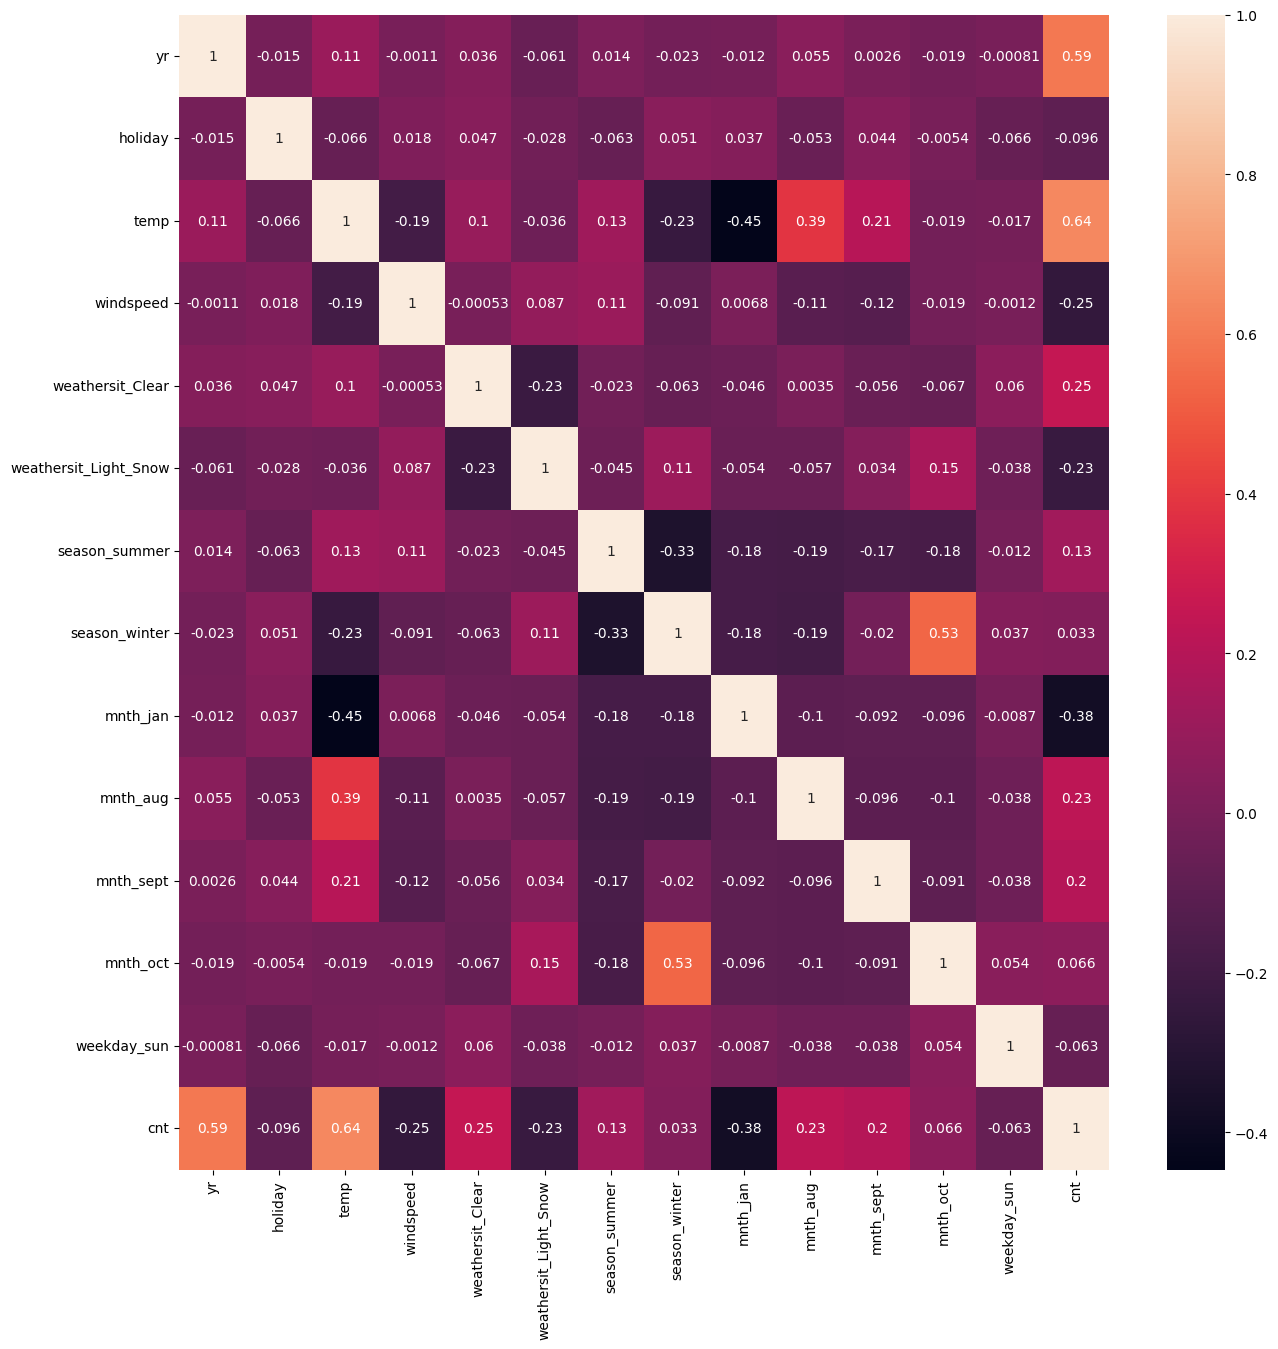

In [105]:
plt.figure(figsize=(15,15))
sns.heatmap(df_Dep_Inde_var.corr(),annot=True)

<Axes: >

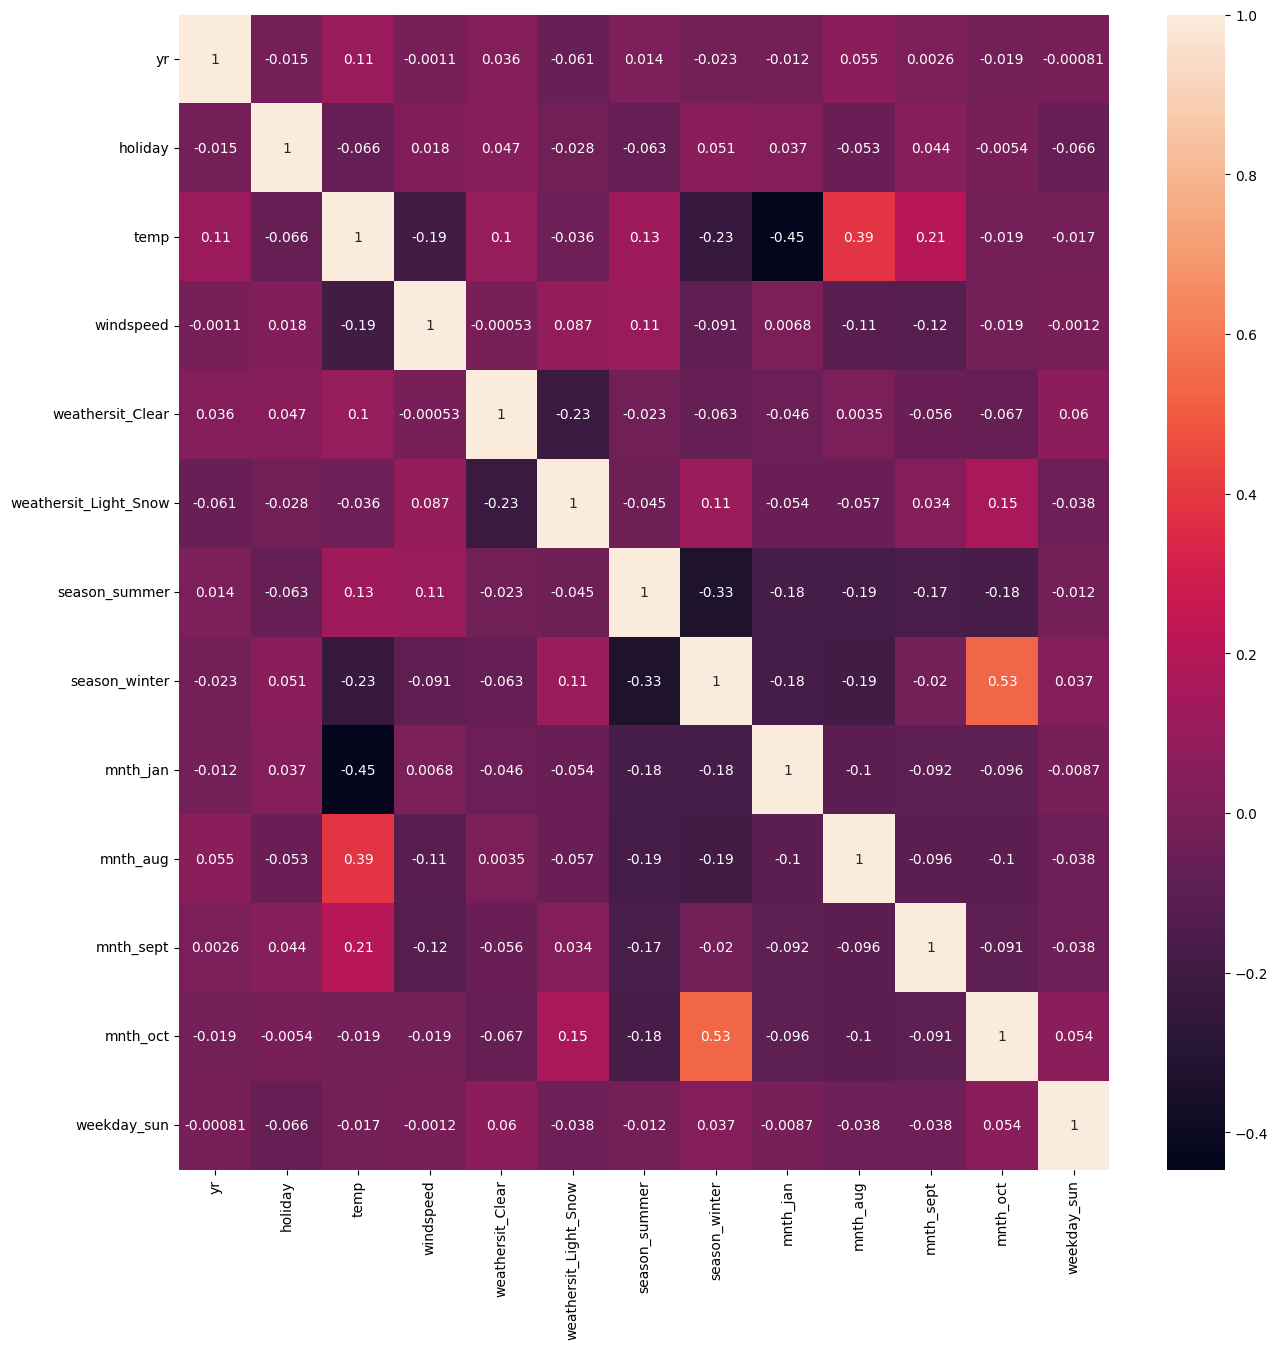

In [106]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train_Model4.corr(),annot=True)

In [148]:
## Model 6

In [213]:
# Import RFE
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

# RFE with 15 features
lm = LinearRegression()
estimator = SVR(kernel="linear")
rfe1 = RFE(estimator, n_features_to_select=8, step=1)

# Fit with 15 features
rfe1.fit(X_train_Model4, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_) 


[ True  True  True  True False  True  True  True False False  True False
 False]
[1 1 1 1 2 1 1 1 4 6 1 3 5]


In [214]:
list(zip(X_train_Model4.columns,rfe1.support_,rfe1.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('windspeed', True, 1),
 ('weathersit_Clear', False, 2),
 ('weathersit_Light_Snow', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_jan', False, 4),
 ('mnth_aug', False, 6),
 ('mnth_sept', True, 1),
 ('mnth_oct', False, 3),
 ('weekday_sun', False, 5)]

In [215]:
X_train_Model4.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'weathersit_Clear',
       'weathersit_Light_Snow', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_aug', 'mnth_sept', 'mnth_oct', 'weekday_sun'],
      dtype='object')

In [217]:
### Building model using statsmodel, for the detailed statistics
col1 = X_train_Model4.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_model6 = X_train_Model4[col1]


In [218]:
# Add a constant to the model
X_train_model6 = sm.add_constant(X_train_model6)
X_train_model6.head()

# Fitting the model with 15 variables
lm6 = sm.OLS(y_train, X_train_model6).fit()   
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     256.0
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          1.42e-171
Time:                        20:11:14   Log-Likelihood:                 453.37
No. Observations:                 510   AIC:                            -888.7
Df Residuals:                     501   BIC:                            -850.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

In [219]:
X=X_train_model6

In [ ]:
X.drop('const',axis=1,inplace=True)

In [222]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.63
3,windspeed,2.97
0,yr,2.00
5,season_summer,1.55
6,season_winter,1.35
7,mnth_sept,1.20
4,weathersit_Light_Snow,1.06
1,holiday,1.03


In [ ]:
## We need to drop the column mnth_oct as p_value=0.111

In [ ]:
## Model 7

In [174]:
X_train_Model7=X_train_model6.drop('mnth_oct',axis=1)

In [177]:
X_train_model7=X_train_Model7.drop('const',axis=1)

In [178]:
X_train_model7.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'weathersit_Clear',
       'weathersit_Light_Snow', 'season_summer', 'season_winter', 'mnth_sept'],
      dtype='object')

In [179]:
# Add a constant to the model
X_train_Model7 = sm.add_constant(X_train_Model7)
X_train_Model7.head()

# Fitting the model with 15 variables
lm7 = sm.OLS(y_train, X_train_Model7).fit()   
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Mon, 19 Aug 2024   Prob (F-statistic):          1.37e-186
Time:                        20:00:57   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.04

In [183]:
X=X_train_Model7

In [184]:
X.drop('const',axis=1,inplace=True)

In [185]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.37
3,windspeed,3.17
4,weathersit_Clear,2.69
0,yr,2.00
6,season_summer,1.55
7,season_winter,1.36
8,mnth_sept,1.20
5,weathersit_Light_Snow,1.11
1,holiday,1.04


In [186]:
y_train.shape

(510,)

In [223]:
X_train_model6.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'weathersit_Light_Snow',
       'season_summer', 'season_winter', 'mnth_sept'],
      dtype='object')

In [224]:
X_train_model6 = sm.add_constant(X_train_model6)

In [225]:
y_train_pred = lm6.predict ( X_train_model6)

Text(0.5, 0, 'Errors')

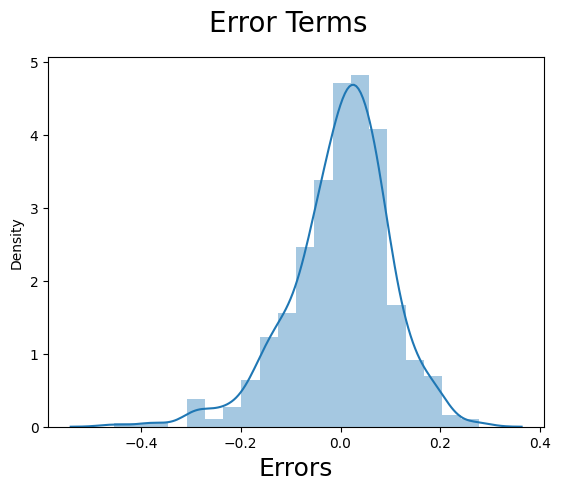

In [226]:
res=y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

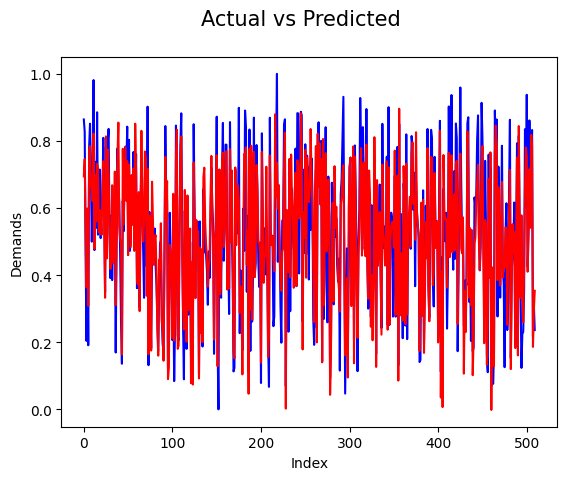

In [227]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train_model6),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

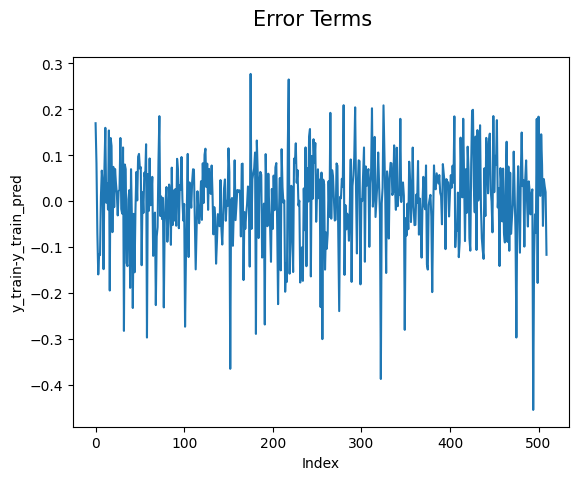

In [228]:
# Error Terms
c = [i for i in range(0,len(X_train_model6),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

In [230]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8034639484380852

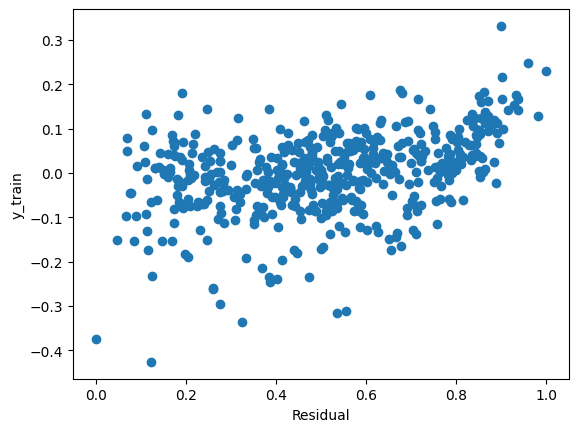

In [169]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

# Test Data set

In [ ]:
#### Dividing into X_test and y_test
y_test=df_test.pop('cnt')
X_test=df_test

In [232]:
print(X_test.shape)
print(y_test.shape)

(219, 33)
(219,)


In [233]:
X_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,weathersit_Clear,weathersit_Mist_Cloudy,weathersit_Light_Snow,...,mnth_oct,mnth_nov,mnth_dec,weekday_sun,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,1,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,1,0,0,...,0,0,0,0,0,0,1,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,1,0,...,1,0,0,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,1,0,0,...,0,0,0,0,0,0,1,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,0.257562,0.243430,0.708888,0.287411,0,1,0,...,0,0,0,1,0,0,0,0,0,0
702,1,0,1,0.519232,0.511907,0.756118,0.283397,1,0,0,...,0,0,1,0,0,1,0,0,0,0
127,0,0,0,0.584649,0.577380,0.650923,0.069510,1,0,0,...,0,0,0,1,0,0,0,0,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.052115,0,1,0,...,1,0,0,0,0,0,1,0,0,0


In [234]:
X_train_model6

,const,yr,holiday,temp,windspeed,weathersit_Light_Snow,season_summer,season_winter,mnth_sept
653,1.0,1,0,0.509887,0.300794,0,0,1,0
576,1.0,1,0,0.815169,0.264686,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0
...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,1,0,0
578,1.0,1,0,0.863973,0.187140,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0


In [235]:
X_train_model6=X_train_model6.drop('const',axis=1)

In [236]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_model6.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [237]:
y_test_pred = lm6.predict(X_test_new)

Text(0, 0.5, 'y_test_pred')

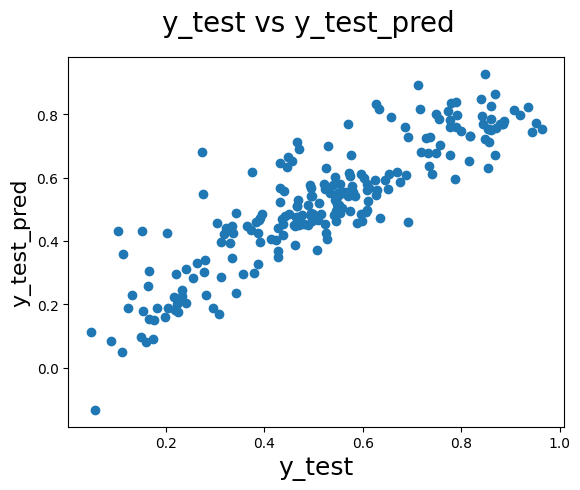

In [238]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

In [239]:
r2_score(y_test,y_test_pred)

0.7724376516730698

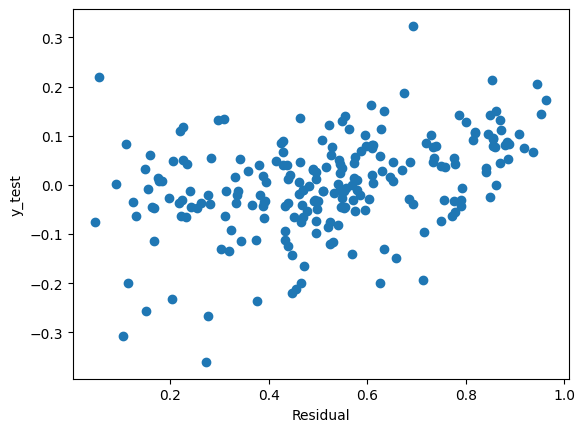

In [1132]:
# scatter plot for the check
residual = (y_test - y_test_pred)
plt.scatter(y_test,residual)
plt.ylabel("y_test")
plt.xlabel("Residual")
plt.show()

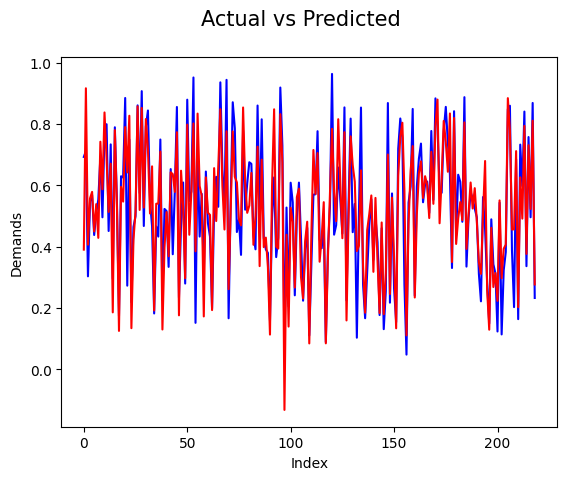

In [207]:
# Actual vs Predicted
c = [i for i in range(0,len(X_test_new),1)]
plt.plot(c,y_test, color="blue")
plt.plot(c,y_test_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

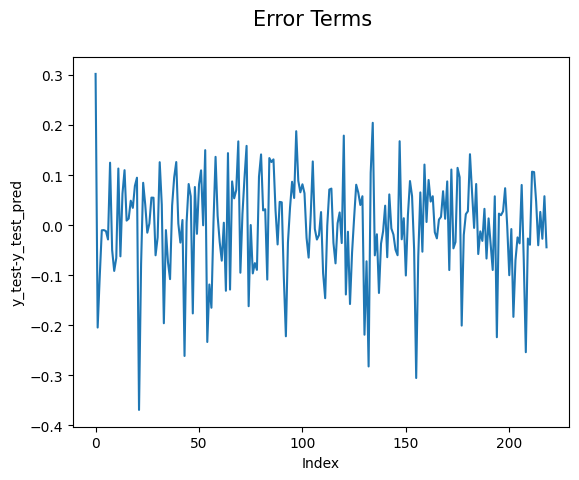

In [210]:
# Error Terms
c = [i for i in range(0,len(X_test_new),1)]
plt.plot(c,y_test-y_test_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_test-y_test_pred')
plt.show()

In [211]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

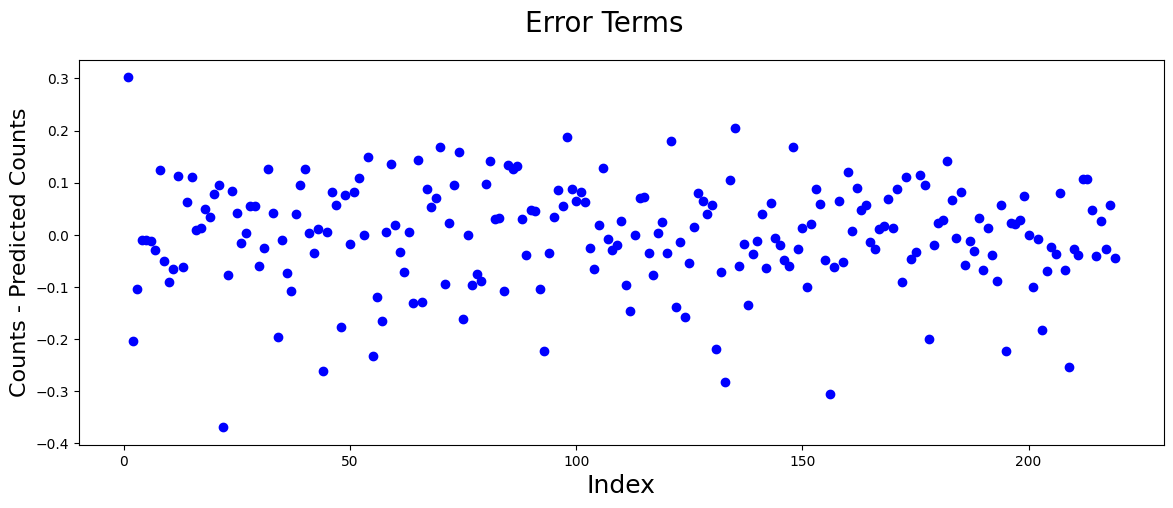

In [212]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)